# 非線性 SVM-XOR 問題

<table>
    <tr>
        <td>神經網絡</td>
        <td>可以解決問題</td>
        <td>無法解決問題</td>
    </tr>
    <tr>
        <td>感知器(Perceptron)</td>
        <td>可解決分類問題</td>
        <td>
            <br>1.沒有分類線,不直觀</br>
            <br>2.無法解決非線性問題(XOR問題)</br>
        </td>
    </tr>
    <tr>
        <td>邏輯斯迴歸(Logistic Regression)</td>
        <td>
            <br>1.可解決分類問題</br>
            <br>2.有分類線,很直觀的表示分類方式</br>
        </td>
        <td>無法解決非線性問題(XOR問題)</td>
    </tr>
    <tr>
        <td>支援向量機 (Support Vector Machine)</td>
        <td>
            <br>1.可解決分類問題</br>
            <br>2.有分類線,很直觀的表示分類方式</br>
            <br>3.可解決非線性問題(XOR問題)</br>
        </td>
        <td></td>
    </tr>
    <tr>
        <td>多層感知器 (Multi-layer Perceptron)</td>
        <td>
            <br>1.可解決分類問題</br>
            <br>2.有分類線,很直觀的表示分類方式</br>
            <br>3.可解決非線性問題(XOR問題)</br>
        </td>
        <td></td>
    </tr>
</table>

## 1-加載 Library

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.plotting import plot_decision_regions

## 2-數據集處理

In [2]:
from numpy import random
# 可以用 numpy 快速產生隨機, 第一個參數是你產生有多少種類
# 第二個參數是你要幾個
# x1 是我們的第一特徵, 你可以想像成帥
# x2 是我們的第二特徵, 你可以想像成有才華
x1 = random.choice([True, False], 100)
x2 = random.choice([True, False], 100)
# y 是我們的 target, 你可以想像成會不會喜歡
y = np.logical_xor(x1, x2)
df = pd.DataFrame(columns = ["x1", "x2", "y"])
df["x1"] = x1
df["x2"] = x2
df["y"] = y
df = df.astype(int)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,0,1,1
3,1,0,1
4,1,0,1
...,...,...,...
95,0,1,1
96,0,0,0
97,0,1,1
98,1,1,0


In [12]:
from sklearn.model_selection import train_test_split
data = df.drop(["target"], axis = 1)
data_train, data_test, target_train, target_test = train_test_split(data,
                                                                    df['target'],
                                                                    test_size=0.1)

## 3-建立模型(Non-Linear SVM)

In [3]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf = clf.fit(df.drop(["y"], axis = 1), df["y"])

## 4-繪圖(Non-Linear SVM)的決策邊界

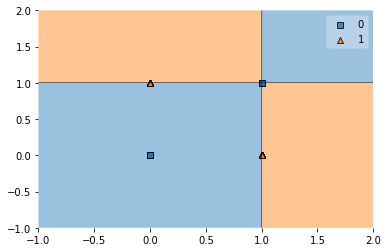

In [4]:
plot_decision_regions(X=np.array(df.drop(["y"], axis = 1)),
                      y=np.array(df["y"]),
                      clf=clf)

## 5-載入(測試集資料)

In [5]:
x1 = random.choice([True, False], 50)
x2 = random.choice([True, False], 50)
df_test = pd.DataFrame(columns = ["x1", "x2", "y"])
df_test["x1"] = x1
df_test["x2"] = x2
df_test["y"] = np.logical_xor(x1, x2) # XOR運算

## 6-模型準確率分析

In [6]:
from sklearn.metrics import accuracy_score
predict = clf.predict(df_test.drop(["y"], axis = 1))
print("預測:", list(predict))
print("正確標籤:", list(df_test["y"]))
print("正確率: ", accuracy_score(df_test["y"], predict) * 100, "%")

預測: [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
正確標籤: [True, False, False, False, True, False, False, True, True, True, False, True, False, True, False, False, True, False, False, False, False, False, True, False, False, True, True, True, False, False, True, False, False, False, False, False, True, True, True, False, True, True, True, True, False, False, False, True, True, True]
正確率:  100.0 %


### SVM的極限: 無法解決(抽象問題的分類)